In [1]:
%run convention.ipynb

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\dell\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


# K-Means

In [3]:
from sklearn.datasets import make_blobs
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

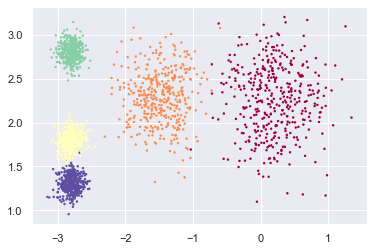

In [6]:
plt.scatter(X[:,0], X[:,1], c = y, cmap = 'Spectral', s = 2)

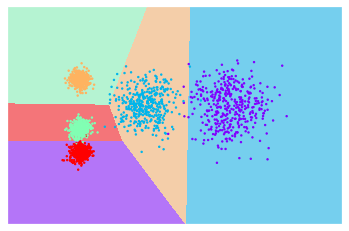

In [18]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5)
model.fit(X, y)

plt.scatter(X[:,0], X[:,1], c = y, cmap = 'rainbow', s = 2)
mglearn.plots.plot_2d_classification(model, X, alpha = .5, cm = 'rainbow')


## Inertia

To select the best model, we will need a way to evaluate a K-Mean model's performance. Unfortunately, clustering is an unsupervised task, so we do not have the targets. But at least we can measure the distance between each instance and its centroid. This is the idea behind the <u>inertia</u> metric:

In [19]:
model.inertia_

211.5985372581684

The <code>score()</code> method returns the negative inertia. Why negative? Well, it is because a predictor's <code>score()</code> method must always respect the <b>"great is better"</b> rule.

In [20]:
model.score(X)

-211.59853725816856

## Hard cluster vs Soft cluster

Rather than arbitrarily choosing the closest cluster for each instance, which is called <i>hard clustering</i>, it might be better measure the distance of each instance to all 5 centroids. This is what the <code>transform()</code> method does:

In [22]:
#arr[i, j]: the distance of the i-th point to the centroid of the j-th cluster 
model.transform([(0, 0), (10, 5)])

array([[ 3.08775898,  2.26515398,  3.95224239,  2.71599271,  3.33257904],
       [13.3241708 , 10.16860501, 12.98130098, 11.78363272, 13.19743181]])